In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [5]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
model = Sequential()

In [7]:
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
Base_Model = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 3s 269us/step - loss: 0.8312 - accuracy: 0.7367 - val_loss: 0.6726 - val_accuracy: 0.7624
Epoch 2/20
12660/12660 [==============================] - 3s 248us/step - loss: 0.3804 - accuracy: 0.8731 - val_loss: 0.5159 - val_accuracy: 0.8420
Epoch 3/20
12660/12660 [==============================] - 3s 248us/step - loss: 0.2857 - accuracy: 0.9076 - val_loss: 0.4944 - val_accuracy: 0.8631
Epoch 4/20
12660/12660 [==============================] - 3s 242us/step - loss: 0.2469 - accuracy: 0.9184 - val_loss: 0.5742 - val_accuracy: 0.8592
Epoch 5/20
12660/12660 [==============================] - 3s 244us/step - loss: 0.1970 - accuracy: 0.9397 - val_loss: 0.4381 - val_accuracy: 0.8990
Epoch 6/20
12660/12660 [==============================] - 3s 242us/step - loss: 0.1513 - accuracy: 0.9498 - val_loss: 0.3433 - val_accuracy: 0.9249
Epoch 7/20
12660/12660 [==============================] - 3s 24

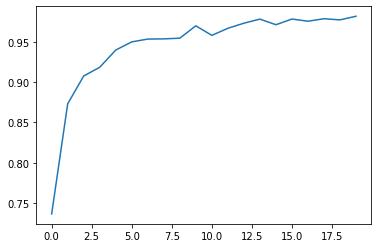

In [11]:
plt.plot(Base_Model.history['accuracy'])

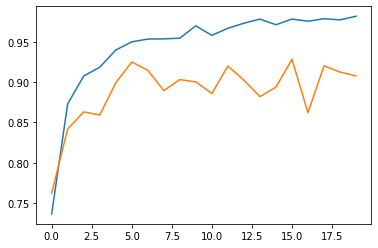

In [13]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])

In [14]:
score = model.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 98us/step


In [30]:
score 

[0.48275352509187563, 0.9076738357543945]

In [52]:
predictions = model.predict_classes(x_test, batch_size=10)

In [48]:
rounded_labels=np.argmax(y_test, axis=1)

In [49]:
cm = confusion_matrix(rounded_labels, predictions)

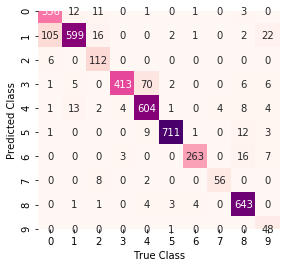

In [50]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [64]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       450
           1       0.80      0.95      0.87       630
           2       0.95      0.75      0.84       150
           3       0.82      0.98      0.89       420
           4       0.94      0.88      0.91       690
           5       0.96      0.99      0.98       720
           6       0.91      0.97      0.94       270
           7       0.85      0.93      0.89        60
           8       0.98      0.93      0.96       690
           9       0.98      0.53      0.69        90

    accuracy                           0.91      4170
   macro avg       0.91      0.87      0.88      4170
weighted avg       0.91      0.91      0.91      4170



# Changing Layers

## Double the layers

In [134]:
model1 = Sequential()

In [135]:
model1.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model1.add(Dense(512, activation = 'relu'))

# Layer 3
model1.add(Dense(512, activation = 'relu'))

# Layer 4
model1.add(Dense(512, activation = 'relu'))

#Output Layer
model1.add(Dense(10, activation = 'softmax'))

In [136]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [137]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_79 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_80 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_81 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_82 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [138]:
DoubleLayer = model1.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 6s 445us/step - loss: 0.8763 - accuracy: 0.7019 - val_loss: 0.5649 - val_accuracy: 0.7755
Epoch 2/20
12660/12660 [==============================] - 5s 426us/step - loss: 0.3609 - accuracy: 0.8679 - val_loss: 0.3771 - val_accuracy: 0.8811
Epoch 3/20
12660/12660 [==============================] - 5s 414us/step - loss: 0.2840 - accuracy: 0.8977 - val_loss: 0.5157 - val_accuracy: 0.8559
Epoch 4/20
12660/12660 [==============================] - 5s 410us/step - loss: 0.2225 - accuracy: 0.9227 - val_loss: 0.5247 - val_accuracy: 0.8540
Epoch 5/20
12660/12660 [==============================] - 5s 415us/step - loss: 0.2122 - accuracy: 0.9228 - val_loss: 0.4806 - val_accuracy: 0.8597
Epoch 6/20
12660/12660 [==============================] - 5s 427us/step - loss: 0.1649 - accuracy: 0.9406 - val_loss: 0.3552 - val_accuracy: 0.9070
Epoch 7/20
12660/12660 [==============================] - 5s 41

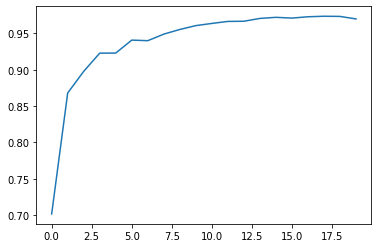

In [139]:
plt.plot(DoubleLayer.history['accuracy'])

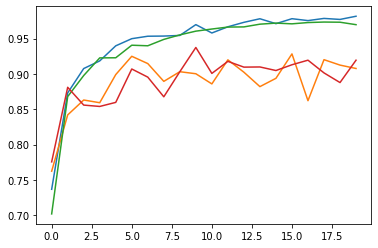

In [140]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(DoubleLayer.history['accuracy'])
plt.plot(DoubleLayer.history['val_accuracy'])

In [141]:
score = model1.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 103us/step


In [142]:
score

[0.3940696577972574, 0.9194244742393494]

In [143]:
predictions = model1.predict_classes(x_test, batch_size=10)

In [144]:
cm = confusion_matrix(rounded_labels, predictions)

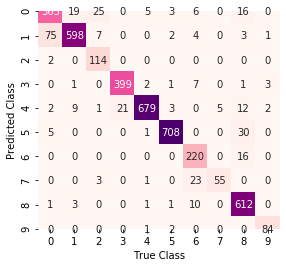

In [145]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [146]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       450
           1       0.87      0.95      0.91       630
           2       0.98      0.76      0.86       150
           3       0.96      0.95      0.96       420
           4       0.93      0.98      0.95       690
           5       0.95      0.98      0.97       720
           6       0.93      0.81      0.87       270
           7       0.67      0.92      0.77        60
           8       0.97      0.89      0.93       690
           9       0.97      0.93      0.95        90

    accuracy                           0.92      4170
   macro avg       0.91      0.90      0.90      4170
weighted avg       0.92      0.92      0.92      4170



## Half the Layers

In [122]:
model2 = Sequential()

In [123]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [124]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [125]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_77 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [126]:
OneLayer = model2.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 2s 181us/step - loss: 0.9688 - accuracy: 0.7229 - val_loss: 0.7062 - val_accuracy: 0.7597
Epoch 2/20
12660/12660 [==============================] - 2s 166us/step - loss: 0.4705 - accuracy: 0.8605 - val_loss: 0.6517 - val_accuracy: 0.8295
Epoch 3/20
12660/12660 [==============================] - 2s 165us/step - loss: 0.3352 - accuracy: 0.9034 - val_loss: 0.5155 - val_accuracy: 0.8189
Epoch 4/20
12660/12660 [==============================] - 2s 167us/step - loss: 0.2755 - accuracy: 0.9183 - val_loss: 0.4479 - val_accuracy: 0.8849
Epoch 5/20
12660/12660 [==============================] - 2s 161us/step - loss: 0.2400 - accuracy: 0.9314 - val_loss: 0.5517 - val_accuracy: 0.8309
Epoch 6/20
12660/12660 [==============================] - 2s 175us/step - loss: 0.2301 - accuracy: 0.9355 - val_loss: 0.4245 - val_accuracy: 0.8914
Epoch 7/20
12660/12660 [==============================] - 2s 16

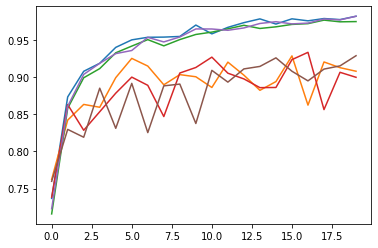

In [127]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(DoubleLayer.history['accuracy'])
plt.plot(DoubleLayer.history['val_accuracy'])
plt.plot(OneLayer.history['accuracy'])
plt.plot(OneLayer.history['val_accuracy'])

In [128]:
score = model2.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 54us/step


In [129]:
score

[0.37438506212987777, 0.9285371899604797]

In [130]:
predictions = model2.predict_classes(x_test, batch_size=10)

In [131]:
cm = confusion_matrix(rounded_labels, predictions)

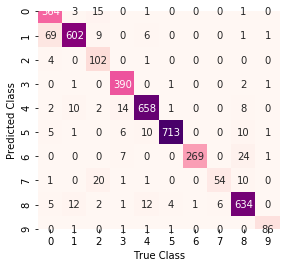

In [132]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [133]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       450
           1       0.88      0.96      0.91       630
           2       0.95      0.68      0.79       150
           3       0.99      0.93      0.96       420
           4       0.95      0.95      0.95       690
           5       0.96      0.99      0.97       720
           6       0.89      1.00      0.94       270
           7       0.62      0.90      0.73        60
           8       0.94      0.92      0.93       690
           9       0.96      0.96      0.96        90

    accuracy                           0.93      4170
   macro avg       0.91      0.91      0.90      4170
weighted avg       0.93      0.93      0.93      4170



# Changing Epochs

## Half Epochs

In [148]:
model3 = Sequential()

In [149]:
model3.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model3.add(Dense(512, activation = 'relu'))

#Output Layer
model3.add(Dense(10, activation = 'softmax'))

In [150]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [151]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_84 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_85 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [153]:
HalfEpochs = model3.fit(x_train,y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/10
12660/12660 [==============================] - 4s 281us/step - loss: 0.8432 - accuracy: 0.7293 - val_loss: 0.6886 - val_accuracy: 0.7871
Epoch 2/10
12660/12660 [==============================] - 3s 251us/step - loss: 0.3542 - accuracy: 0.8865 - val_loss: 0.5316 - val_accuracy: 0.8326
Epoch 3/10
12660/12660 [==============================] - 3s 255us/step - loss: 0.2784 - accuracy: 0.9080 - val_loss: 0.4413 - val_accuracy: 0.8688
Epoch 4/10
12660/12660 [==============================] - 3s 252us/step - loss: 0.2349 - accuracy: 0.9227 - val_loss: 0.7276 - val_accuracy: 0.8710
Epoch 5/10
12660/12660 [==============================] - 3s 259us/step - loss: 0.1926 - accuracy: 0.9393 - val_loss: 0.3864 - val_accuracy: 0.8894
Epoch 6/10
12660/12660 [==============================] - 3s 255us/step - loss: 0.1649 - accuracy: 0.9477 - val_loss: 0.3965 - val_accuracy: 0.9048
Epoch 7/10
12660/12660 [==============================] - 3s 24

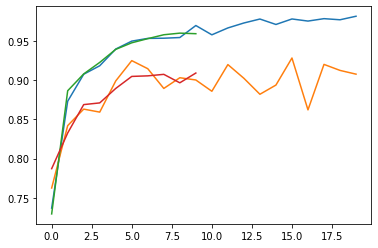

In [154]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(HalfEpochs.history['accuracy'])
plt.plot(HalfEpochs.history['val_accuracy'])

In [155]:
score = model3.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 68us/step


In [156]:
score

[0.40326762165454366, 0.9091126918792725]

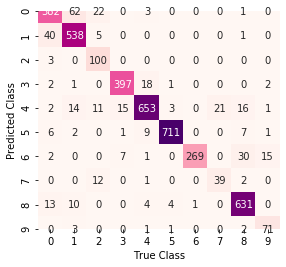

In [158]:
predictions = model3.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [159]:
print(classification_report(rounded_labels,predictions))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       450
           1       0.92      0.85      0.89       630
           2       0.97      0.67      0.79       150
           3       0.94      0.95      0.94       420
           4       0.89      0.95      0.92       690
           5       0.96      0.99      0.98       720
           6       0.83      1.00      0.91       270
           7       0.72      0.65      0.68        60
           8       0.95      0.91      0.93       690
           9       0.91      0.79      0.85        90

    accuracy                           0.91      4170
   macro avg       0.89      0.86      0.87      4170
weighted avg       0.91      0.91      0.91      4170



# Double Epochs

In [170]:
model4 = Sequential()

In [171]:
model4.add(Dense(512, activation='relu', input_shape=(784,)))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(10, activation='softmax'))


In [172]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [173]:
model4.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_93 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_94 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [175]:
DoubleEpochs = model4.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/40
12660/12660 [==============================] - 3s 253us/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.5037 - val_accuracy: 0.9266
Epoch 2/40
12660/12660 [==============================] - 3s 254us/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.5326 - val_accuracy: 0.9074
Epoch 3/40
12660/12660 [==============================] - 3s 254us/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.4568 - val_accuracy: 0.9312
Epoch 4/40
12660/12660 [==============================] - 3s 270us/step - loss: 0.0579 - accuracy: 0.9831 - val_loss: 0.4264 - val_accuracy: 0.9369
Epoch 5/40
12660/12660 [==============================] - 3s 252us/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.4623 - val_accuracy: 0.9321
Epoch 6/40
12660/12660 [==============================] - 3s 263us/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.5363 - val_accuracy: 0.9187
Epoch 7/40
12660/12660 [==============================] - 3s 25

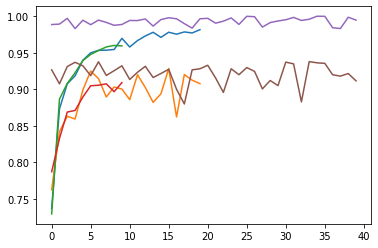

In [176]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(HalfEpochs.history['accuracy'])
plt.plot(HalfEpochs.history['val_accuracy'])
plt.plot(DoubleEpochs.history['accuracy'])
plt.plot(DoubleEpochs.history['val_accuracy'])

In [179]:
score = model4.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 58us/step


In [180]:
score

[0.5430014838739264, 0.9115107655525208]

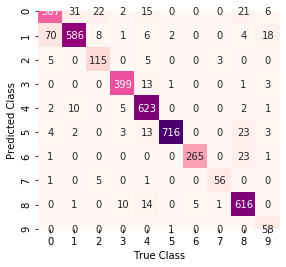

In [181]:
predictions = model4.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [182]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       450
           1       0.84      0.93      0.88       630
           2       0.90      0.77      0.83       150
           3       0.96      0.95      0.95       420
           4       0.97      0.90      0.93       690
           5       0.94      0.99      0.96       720
           6       0.91      0.98      0.95       270
           7       0.89      0.93      0.91        60
           8       0.95      0.89      0.92       690
           9       0.98      0.64      0.78        90

    accuracy                           0.91      4170
   macro avg       0.91      0.88      0.89      4170
weighted avg       0.91      0.91      0.91      4170

